# FA691 Homework 2
# Due: Wednesday, February 1 @ 11:59PM

Name: Ryan Shea

Date: 2023-01-26

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed of random number generator
CWID = 10445281 #Place here your Campus wide ID number, this will personalize
#your results, but still maintain the reproduceable nature of using seeds.
#If you ever need to reset the seed in this assignment, use this as your seed
#Papers that use -1 as this CWID variable will earn 0's so make sure you change
#this value before you submit your work.
personal = CWID % 10000
np.random.seed(personal)

## Question 1 (15pt)

### Question 1.1
Use the `yfinance` package (or other method of your choice) to obtain the daily adjusted close prices for 2 different stocks.  You should have at least two years of data for both assets.  You should inspect the dates for your data to make sure you are including everything appropriately.  Create a data frame (or array) of the daily log returns both both stocks along with the lagged returns (2 lags).  Use the `print` command to display your data.

In [2]:
import yfinance as yf
import pandas as pd
import datetime

tickers = ["XLK","XLF"]

data = yf.download(tickers, datetime.datetime(2020, 1, 1), datetime.date.today() - datetime.timedelta(1))['Adj Close'] # up to yesterday
print(data.head(), data.tail(), sep='\n\n')

print("\n\n", "*"*11, "\nLOG RETURNS\n", "*"*11, sep='')

ret = data.apply(lambda x: np.log(x / x.shift(1)))

for i in range(1, 3):
    ret[f"XLK_{i}"] = ret['XLK'].shift(i)
    ret[f"XLF_{i}"] = ret['XLF'].shift(i)

ret = ret[['XLF', 'XLF_1', 'XLF_2', 'XLK', 'XLK_1', 'XLK_2']].dropna()
print(ret.head(), ret.tail(), sep='\n\n')


[*********************100%***********************]  2 of 2 completed
                  XLF        XLK
Date                            
2020-01-02  29.158108  90.642487
2020-01-03  28.848516  89.623375
2020-01-06  28.829750  89.836899
2020-01-07  28.642120  89.798065
2020-01-08  28.829750  90.758957

                  XLF         XLK
Date                             
2023-01-23  35.759998  134.330002
2023-01-24  35.779999  134.270004
2023-01-25  36.060001  133.990005
2023-01-26  36.250000  136.130005
2023-01-27  36.250000  136.699997


***********
LOG RETURNS
***********
                 XLF     XLF_1     XLF_2       XLK     XLK_1     XLK_2
Date                                                                  
2020-01-07 -0.006529 -0.000651 -0.010674 -0.000432  0.002380 -0.011307
2020-01-08  0.006529 -0.006529 -0.000651  0.010644 -0.000432  0.002380
2020-01-09  0.006164  0.006529 -0.006529  0.011272  0.010644 -0.000432
2020-01-10 -0.007466  0.006164  0.006529 -0.002329  0.011272  0.0106

### Question 1.2
Split your data into training and testing sets (80% training and 20% test).

Linearly regress one of your stock returns as a function of the lagged returns (2 lags) for both stocks.
This should be of the form $r_{1,t} = \beta_0 + \beta_{1,1} r_{1,t-1} + \beta_{1,2} r_{1,t-2} + \beta_{2,1} r_{2,t-1} + \beta_{2,2} r_{2,t-2}$.
Evaluate the performance of this model with the mean squared error on the test data.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = ret.drop("XLK", axis=1) # Use XLF as Y

x_train, x_test, y_train, y_test = train_test_split(df.drop("XLF", axis=1), df["XLF"], test_size = 0.2)

# Define loss function
def mse(true, pred):
    return np.mean((true - pred) ** 2)

lr = LinearRegression()
lr.fit(x_train, y_train)
for coef, name in zip(lr.coef_, x_train.columns):
    print(f"\u03B2 {name}: {coef}")

print(f"\nIntercept (\u03B20): {lr.intercept_}")

print(f"\n\nTrain MSE: {mse(y_train, lr.predict(x_train))}")
print(f"Test MSE: {mse(y_test, lr.predict(x_test))}")


β XLF_1: -0.18026208940623678
β XLF_2: 0.2525855496124333
β XLK_1: -0.05749083258265689
β XLK_2: -0.12401664867377898

Intercept (β0): 0.0008436142655939736


Train MSE: 0.0003708331263263233
Test MSE: 0.0004274408569898735


## Question 2 (35pt)

### Question 2.1
Using the same data, train/test split ratio, and consider the same regression problem as in Question 1.2.
Create a feed-forward neural network with a single hidden layer (2 hidden nodes) densely connected to the inputs.
You may choose any activation functions you wish.

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

tf.random.set_seed(personal)

model = keras.Sequential()
model.add(layers.Dense(2, input_shape=(1, 4), activation='relu')) # hidden layer
model.add(layers.Dense(1, activation='linear')) # output layer

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 2)              10        
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1)              3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


2023-01-30 13:03:36.974537: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-30 13:03:36.974768: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Question 2.2
Train this neural network on the training data.  
Evaluate the performance of this model with the mean squared error on the test data.

2023-01-30 13:03:37.078446: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


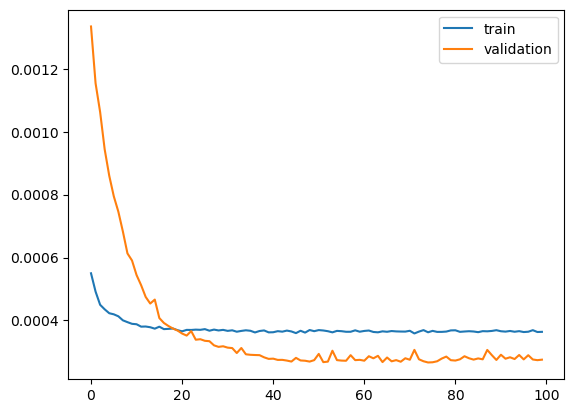



Train MSE: 0.00036383289261721075
Validation MSE: 0.0002753694716375321
Test MSE: 0.00043855380499735475


In [5]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

history = model.fit(x_train, y_train, epochs=100, batch_size=4, verbose=0, validation_split=0.1)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

print(f"\n\nTrain MSE: {history.history['mse'][-1]}")
print(f"Validation MSE: {history.history['val_mse'][-1]}")

print(f"Test MSE: {model.evaluate(x_test, y_test, verbose=0)[0]}")

The test MSE is slightly worse than the Linear Regression, so the Linear Regression should be used. It is a simpler model that has better performance on the test data.

### Question 2.3
Using the same train/test split and consider the same regression problem as in Question 1.2.
Train and test another neural network of your own design.

In [6]:
model2 = keras.Sequential()
model2.add(layers.Dense(4, input_shape=(1, 4), activation='tanh')) # hidden layer
model2.add(layers.Dense(64, activation='relu')) # hidden layer
model2.add(layers.Dense(16, activation='relu')) # hidden layer
model2.add(layers.Dense(1, activation='linear')) # output layer

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1, 4)              20        
_________________________________________________________________
dense_3 (Dense)              (None, 1, 64)             320       
_________________________________________________________________
dense_4 (Dense)              (None, 1, 16)             1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1, 1)              17        
Total params: 1,397
Trainable params: 1,397
Non-trainable params: 0
_________________________________________________________________


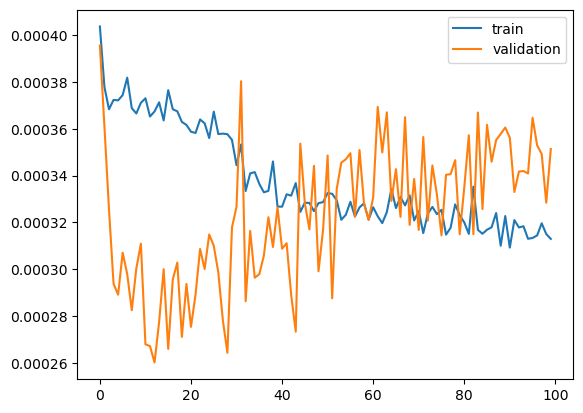



Train MSE: 0.0003129582037217915
Validation MSE: 0.000351360795320943
Test MSE: 0.00044166238512843847


In [7]:
from tensorflow.keras.optimizers import Adam

# Training model loss jumped around, so retraining with lower learning rate
opt = Adam(learning_rate=0.0008)
model2.compile(loss='mse', optimizer=opt, metrics=['mse'])


history2 = model2.fit(x_train, y_train, epochs=100, batch_size=4, verbose=0, validation_split=0.1)

plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')
plt.legend()
plt.show()

print(f"\n\nTrain MSE: {history2.history['mse'][-1]}")
print(f"Validation MSE: {history2.history['val_mse'][-1]}")

print(f"Test MSE: {model2.evaluate(x_test, y_test, verbose=0)[0]}")

## Question 3 (10pt)

## Question 3.1
Consider the same regression problem as in Question 1.2.
Of the methods considered in this assignment, which would you recommend in practice?
Explain briefly (1 paragraph) why you choose this fit. 

Out of the different models the Linear Regression would be the one I would choose. It had roughly the same loss as the more complex neural network, and is simpler. There is a total of 1,397 parameters to be trained on the NN and much fewer for the linear regression. The NN is also more prone to overfitting, as it has more parameters to train on. The NN also has a much higher training time, which is important for real world applications. As there is no real benefit towards accuracy, the linear regression is the better choice.